In [1]:
%matplotlib inline
from misc import *
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
seed = 8
data_dir = 'data'
train_size = 94*3*7
batch_size = 64
n_lstm = 100
epochs = 1000
noise = 0.1

In [3]:
X_train, X_validation, X_test, Y_train, Y_validation, Y_test, le = load_prepare_data(data_dir, train_size, seed)
model, lstm_activations = prepare_model(100, 'accuracy', X_train, Y_train, (0.0, 0.0), (0.0, 0.0))

/home/husein/space/text-dataset/lstm-visualization/misc.py:83: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  model = Model(input=input_layer, output=output_layer)


In [4]:
model, history = fit_model(model, X_train, Y_train, X_validation, Y_validation, seed, epochs=100, patience=5, batch_size=64, verbosity=1)

/home/husein/space/text-dataset/lstm-visualization/misc.py:102: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  verbose=verbosity)


Train on 1974 samples, validate on 277 samples
Epoch 1/100
1974/1974 [==============================] - 2s - loss: 4.5528 - acc: 0.0081 - val_loss: 4.5458 - val_acc: 0.0072
Epoch 2/100
1974/1974 [==============================] - 2s - loss: 4.5446 - acc: 0.0101 - val_loss: 4.5446 - val_acc: 0.0072
Epoch 3/100
1974/1974 [==============================] - 2s - loss: 4.5321 - acc: 0.0177 - val_loss: 4.4976 - val_acc: 0.0289
Epoch 4/100
1974/1974 [==============================] - 2s - loss: 4.4590 - acc: 0.0167 - val_loss: 4.4996 - val_acc: 0.0217
Epoch 5/100
1974/1974 [==============================] - 2s - loss: 4.5304 - acc: 0.0162 - val_loss: 4.5467 - val_acc: 0.0072
Epoch 6/100
1974/1974 [==============================] - 2s - loss: 4.4860 - acc: 0.0218 - val_loss: 4.4358 - val_acc: 0.0108
Epoch 7/100
1974/1974 [==============================] - 2s - loss: 4.3452 - acc: 0.0223 - val_loss: 4.2566 - val_acc: 0.0181
Epoch 8/100
1974/1974 [==============================] - 2s - loss: 4.1

1974/1974 [==============================] - 2s - loss: 1.1547 - acc: 0.5816 - val_loss: 1.3656 - val_acc: 0.5162
Epoch 66/100
1974/1974 [==============================] - 2s - loss: 1.2661 - acc: 0.5578 - val_loss: 1.1730 - val_acc: 0.5993
Epoch 67/100
1974/1974 [==============================] - 2s - loss: 1.0881 - acc: 0.6221 - val_loss: 1.1496 - val_acc: 0.6282
Epoch 68/100
1974/1974 [==============================] - 2s - loss: 0.9987 - acc: 0.6540 - val_loss: 1.0374 - val_acc: 0.6498
Epoch 69/100
1974/1974 [==============================] - 2s - loss: 1.0573 - acc: 0.6342 - val_loss: 1.2138 - val_acc: 0.6029
Epoch 70/100
1974/1974 [==============================] - 2s - loss: 1.0871 - acc: 0.6109 - val_loss: 1.1222 - val_acc: 0.6318
Epoch 71/100
1974/1974 [==============================] - 2s - loss: 1.0080 - acc: 0.6393 - val_loss: 1.0026 - val_acc: 0.6931
Epoch 72/100
1974/1974 [==============================] - 2s - loss: 0.9282 - acc: 0.6611 - val_loss: 0.9792 - val_acc: 0.66

In [5]:
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

def custom_activation(x):
    return x

act = lstm_activations.predict(X_train)
labels = le.inverse_transform(np.argmax(Y_train, axis=1))
X_autoencoder, Y_autoencoder = prepare_autoencoder_input(act, noise, seed, min_=10, max_=65)

decoded2D, encoded2D = prepare_autoencoder(n_lstm, 2, dense_1=600, dense_2=150, activation=custom_activation)
decoded2D, _ = fit_autoencoder(decoded2D, X_autoencoder, Y_autoencoder, seed, patience=5, verbosity=1,epochs=5)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Train on 86856 samples, validate on 21714 samples
Epoch 1/5
86856/86856 [==============================] - 1s - loss: 0.0454 - val_loss: 0.0332
Epoch 2/5
86856/86856 [==============================] - 1s - loss: 0.0301 - val_loss: 0.0276
Epoch 3/5
86856/86856 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0244
Epoch 4/5
86856/86856 [==============================] - 1s - loss: 0.0231 - val_loss: 0.0214
Epoch 5/5
86856/86856 [==============================] - 1s - loss: 0.0212 - val_loss: 0.0201


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


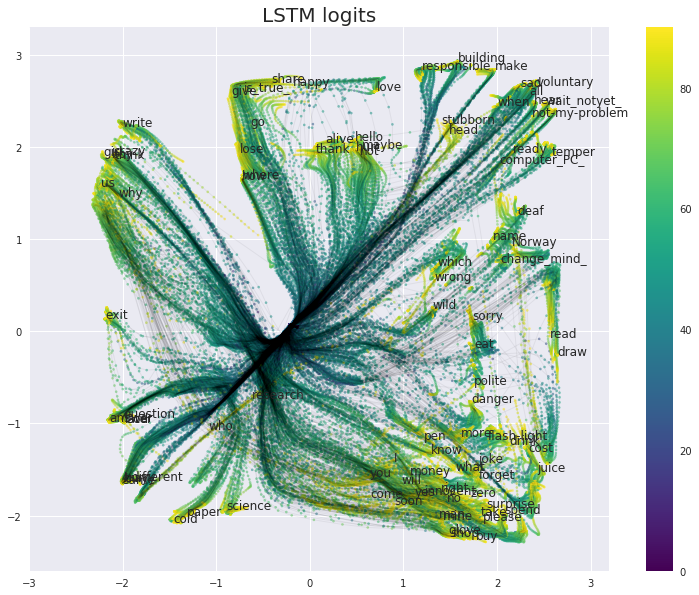

In [6]:
act = lstm_activations.predict(X_train)
labels = le.inverse_transform(np.argmax(Y_train, axis=1))
set_labels = sorted(set(labels))
plot_2D(set_labels, encoded2D, act, labels, 'LSTM logits', -3, 3.2, -2.6, 3.3, 
    figsize=(13,10), frac_labels=0.0, linewidth=1, pointsize=5, fontsize=12, linealpha=0.05, max_steps=90, log=True)